# **CS 4361/5361 Machine Learning**

**Dense Networks and CNNs to classify MNIST and CIFAR-10**

**Author:** [Olac Fuentes](http://www.cs.utep.edu/ofuentes/)<br>
**Last modified:** 2021/11/1<br>

# **Dense Neural Networks using Keras and Tensorflow**

We will be using the Keras library which provides a Python interface for artificial neural networks.

The general guide is at : 
https://keras.io/guides/

We will focus on the Sequential model, described here: https://keras.io/guides/sequential_model/


Import libraries

In [ ]:
import tensorflow as tf
import numpy as np
import os
import distutils
import matplotlib.pyplot as plt

from keras.models import Model

from tensorflow.keras.layers import *
from tensorflow.keras.activations import *

from keras.utils.vis_utils import plot_model

Dense Model Definition

In [ ]:
def dense_model(inputs = 784,hidden_1=500, hidden_2=500):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='relu'))
  model.add(Dense(hidden_2, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

Build and complile model

In [ ]:
dense_network = dense_model()
dense_network.summary() 
dense_network.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

Display model

In [ ]:
plot_model(dense_network, show_shapes=True, show_layer_names=True)

## **Evaluation on the MNIST Dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1)
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


Train model

In [ ]:
history = dense_network.fit(
    x_train, y_train,
    epochs =  20, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

Plot Results

In [ ]:
def plot_results(all_history):
  loss, val_loss, accuracy, val_accuracy = [], [], [], []
  for history in all_history:
    loss += history.history['loss']
    val_loss += history.history['val_loss']
    accuracy += history.history['accuracy']
    val_accuracy += history.history['val_accuracy']

  fig, ax = plt.subplots()
  ax.plot(accuracy,label = 'train')
  ax.plot(val_accuracy,label = 'test')
  ax.set_title('Accuracy')
  ax.legend(loc='lower right')
  fig, ax = plt.subplots()
  ax.plot(loss,label = 'train')
  ax.plot(val_loss,label = 'test')
  ax.set_title('Loss')
  ax.legend(loc='upper right')

In [ ]:
plot_results(all_history)

## **Evaluation on the fashion-MNIST dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1)
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
dense_network = dense_model()
dense_network.summary() 
dense_network.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

In [ ]:
history = dense_network.fit(
    x_train, y_train,
    epochs =  20, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

plot_results(all_history)

## **Evaluation on the CIFAR-10 dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1)
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = np.vstack((x_train, x_train[:,::-1]))
y_train = np.vstack((y_train, y_train))

x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1)
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Display some images from CIFAR-10

In [ ]:
sel = np.random.randint(0,x_train.shape[0],size = 5)
fig, ax = plt.subplots(1,len(sel))
for i,s in enumerate(sel):
  ax[i].imshow(x_train[s].reshape(32,32,3))

In [ ]:
dense_network = dense_model(inputs = x_train.shape[1],hidden_1=250, hidden_2=250)
dense_network.summary() 
dense_network.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

In [ ]:
history = dense_network.fit(
    x_train, y_train,
    epochs =  50, 
    batch_size=128, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

plot_results(all_history)

# **CNNs using Keras and Tensorflow**

In [ ]:
def cnn_model(input_shape=(28,28,1)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  return model

Build and compile model

In [ ]:
cnn = cnn_model()
cnn.summary() 
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
____________________________________________________

Display model

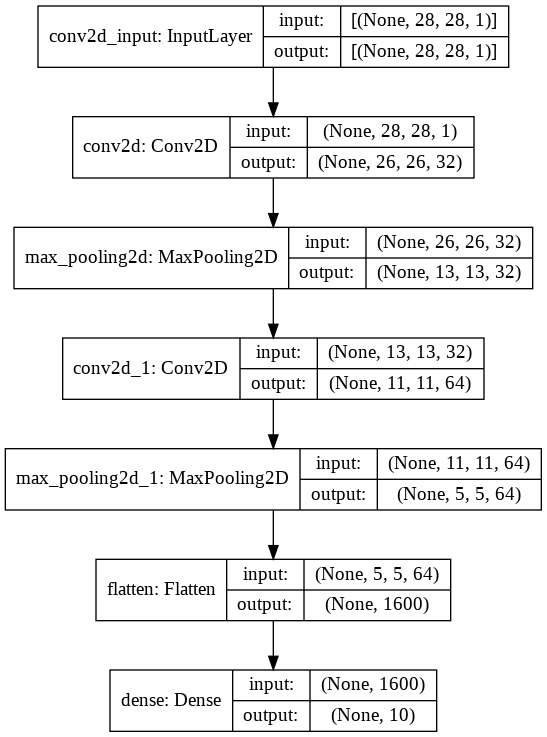

In [ ]:
plot_model(cnn, show_shapes=True, show_layer_names=True)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.float32(np.expand_dims(x_train, -1)/255)
x_test = np.float32(np.expand_dims(x_test, -1)/255)

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


history = cnn.fit(
    x_train, y_train,
    epochs =  20, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

plot_results(all_history)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/20
235/235 [==============================] - 33s 14ms/step - loss: 0.3433 - accuracy: 0.9007 - val_loss: 0.1417 - val_accuracy: 0.9531
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0977 - accuracy: 0.9702 - val_loss: 0.0623 - val_accuracy: 0.9803
Epoch 3/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0686 - accuracy: 0.9789 - val_loss: 0.0895 - val_accuracy: 0.9698
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0552 - accuracy: 0.9827 - val_loss: 0.0635 - val_accuracy: 0.9799
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0410 - val_accuracy: 0.9864
Epoch 6/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0409 - accuracy: 0.9878 - val_loss: 0.0408 - val_accuracy: 0.9857
Epoch 7/20
235/235 [==============================] - 3s 12ms/step - loss: 0

NameError: ignored

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = np.float32(np.expand_dims(x_train, -1)/255)
x_test = np.float32(np.expand_dims(x_test, -1)/255)

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cnn = cnn_model()
cnn.summary() 
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

history = cnn.fit(
    x_train, y_train,
    epochs =  30, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

plot_results(all_history)

170508288/170498071 [==============================] - 11s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-tr

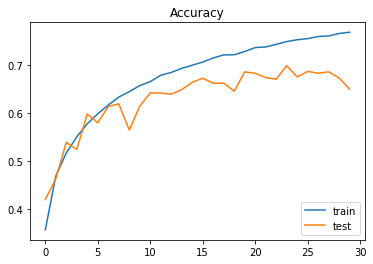

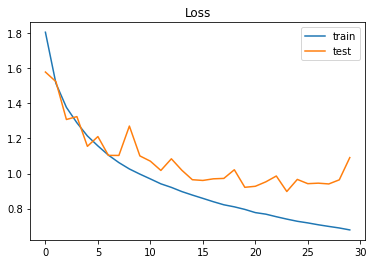

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = np.float32(x_train)/255
x_test = np.float32(x_test)/255

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cnn = cnn_model(input_shape=(32,32,3))
cnn.summary() 
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

history = cnn.fit(
    x_train, y_train,
    epochs =  30, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

plot_results(all_history)